In [60]:
from nilearn.maskers import NiftiMasker

In [2]:
from nilearn.input_data import NiftiMasker

/usr/local/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [4]:
import nitime
import nitime.analysis as nta
import nitime.fmri.io as io
import os
from nibabel import load
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data_path = test_dir_path = os.path.join(nitime.__path__[0], '/Users/admin/Downloads/KKI 3/9922944')
fmri_file = os.path.join(data_path, 'sfnwmrda9922944_session_1_rest_1.nii')

In [11]:
print(fmri_file)

/Users/admin/Downloads/KKI 3/9922944/sfnwmrda9922944_session_1_rest_1.nii


In [61]:
pcc_coords = [(0, -52, 18)]
mpfc_coords = [(0,52,-6)]
lTPJ_coords = [(-48,-54,24)]
rTPJ_coords = [(51,-52,24)]

In [62]:
from nilearn.maskers import NiftiSpheresMasker

seed_masker_pcc = NiftiSpheresMasker(
    pcc_coords, radius=8, detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=0)

seed_masker_mpfc = NiftiSpheresMasker(
    mpfc_coords, radius=8, detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=0)

seed_masker_lTPJ = NiftiSpheresMasker(
    lTPJ_coords, radius=8, detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=0)

seed_masker_rTPJ = NiftiSpheresMasker(
    rTPJ_coords, radius=8, detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=0)


In [63]:
seed_time_series_pcc = seed_masker_pcc.fit_transform(fmri_file)
seed_time_series_mpfc = seed_masker_mpfc.fit_transform(fmri_file)
seed_time_series_lTPJ = seed_masker_lTPJ.fit_transform(fmri_file)
seed_time_series_rTPJ = seed_masker_rTPJ.fit_transform(fmri_file)

In [64]:
from nilearn.maskers import NiftiMasker

brain_masker = NiftiMasker(
    smoothing_fwhm=6, detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=0)

In [65]:
brain_time_series = brain_masker.fit_transform(fmri_file)

In [66]:
print("Seed time series shape(PCC): (%s, %s)" % seed_time_series_pcc.shape)
print("Seed time series shape(MPFC): (%s, %s)" % seed_time_series_mpfc.shape)
print("Seed time series shape(lTPJ): (%s, %s)" % seed_time_series_lTPJ.shape)
print("Seed time series shape(rTPJ): (%s, %s)" % seed_time_series_rTPJ.shape)
print("Brain time series shape: (%s, %s)" % brain_time_series.shape)

Seed time series shape(PCC): (148, 1)
Seed time series shape(MPFC): (148, 1)
Seed time series shape(lTPJ): (148, 1)
Seed time series shape(rTPJ): (148, 1)
Brain time series shape: (148, 59148)


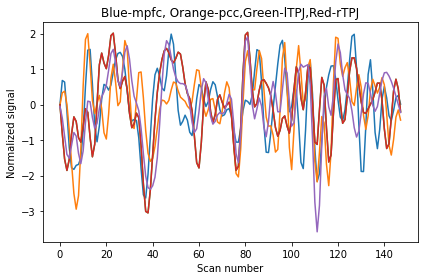

In [73]:
import matplotlib.pyplot as plt

plt.plot(seed_time_series_mpfc)
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()
plt.plot(seed_time_series_pcc)
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()
plt.plot(seed_time_series_lTPJ)
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()
plt.tight_layout()
plt.plot(seed_time_series_lTPJ)
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()
plt.plot(seed_time_series_rTPJ)
plt.title('Blue-mpfc, Orange-pcc,Red-lTPJ,Purple-rTPJ')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()


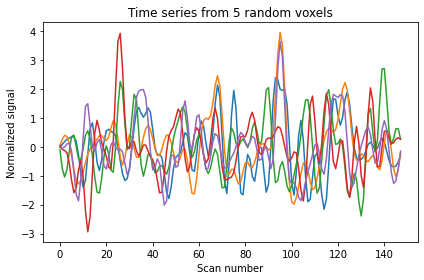

In [42]:
plt.plot(brain_time_series[:, [10, 45, 100, 5000, 10000]])
plt.title('Time series from 5 random voxels')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()

In [75]:
import numpy as np

seed_to_voxel_correlations_mpfc = (np.dot(brain_time_series.T, seed_time_series_mpfc) /
                              seed_time_series_mpfc.shape[0]
                              )
seed_to_voxel_correlations_pcc = (np.dot(brain_time_series.T, seed_time_series_pcc) /
                              seed_time_series_pcc.shape[0]
                              )
seed_to_voxel_correlations_lTPJ = (np.dot(brain_time_series.T, seed_time_series_lTPJ) /
                              seed_time_series_lTPJ.shape[0]
                              )
seed_to_voxel_correlations_rTPJ = (np.dot(brain_time_series.T, seed_time_series_rTPJ) /
                              seed_time_series_rTPJ.shape[0]
                              )

In [76]:
print("Seed-to-voxel correlation shape(MPFC): (%s, %s)" %
      seed_to_voxel_correlations_mpfc.shape)
print("Seed-to-voxel correlation shape(PCC): (%s, %s)" %
      seed_to_voxel_correlations_pcc.shape)
print("Seed-to-voxel correlation shape(lTPJ): (%s, %s)" %
      seed_to_voxel_correlations_lTPJ.shape)
print("Seed-to-voxel correlation shape(rTPJ): (%s, %s)" %
      seed_to_voxel_correlations_rTPJ.shape)
print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % (
    seed_to_voxel_correlations_pcc.min(), seed_to_voxel_correlations_pcc.max()))
print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % (
    seed_to_voxel_correlations_mpfc.min(), seed_to_voxel_correlations_mpfc.max()))
print("Seed-to-voxel correlation(lTPJ): min = %.3f; max = %.3f" % (
    seed_to_voxel_correlations_lTPJ.min(), seed_to_voxel_correlations_lTPJ.max()))
print("Seed-to-voxel correlation(rTPJ): min = %.3f; max = %.3f" % (
    seed_to_voxel_correlations_rTPJ.min(), seed_to_voxel_correlations_rTPJ.max()))

Seed-to-voxel correlation shape(MPFC): (59148, 1)
Seed-to-voxel correlation shape(PCC): (59148, 1)
Seed-to-voxel correlation shape(lTPJ): (59148, 1)
Seed-to-voxel correlation shape(rTPJ): (59148, 1)
Seed-to-voxel correlation: min = -0.645; max = 0.971
Seed-to-voxel correlation: min = -0.585; max = 0.973
Seed-to-voxel correlation(lTPJ): min = -0.614; max = 0.982
Seed-to-voxel correlation(rTPJ): min = -0.665; max = 0.968


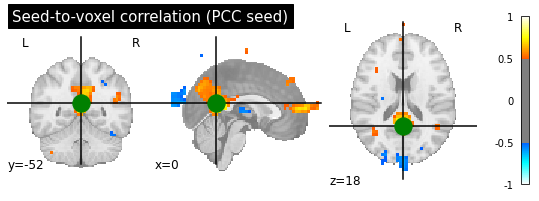

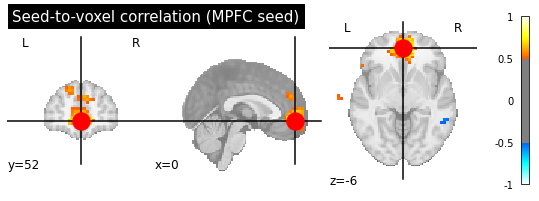

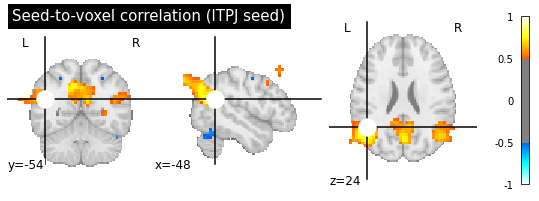

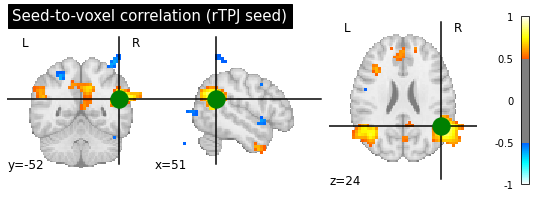

In [79]:
from nilearn import plotting

seed_to_voxel_correlations_img_pcc = brain_masker.inverse_transform(
    seed_to_voxel_correlations_pcc.T)
display = plotting.plot_stat_map(seed_to_voxel_correlations_img_pcc,
                                 threshold=0.5, vmax=1,
                                 cut_coords=pcc_coords[0],
                                 title="Seed-to-voxel correlation (PCC seed)"
                                 )
display.add_markers(marker_coords=pcc_coords, marker_color='g',
                    marker_size=300)
# At last, we save the plot as pdf.
display.savefig('pcc_seed_correlation.pdf')

seed_to_voxel_correlations_img_mpfc = brain_masker.inverse_transform(
    seed_to_voxel_correlations_mpfc.T)
display = plotting.plot_stat_map(seed_to_voxel_correlations_img_mpfc,
                                 threshold=0.5, vmax=1,
                                 cut_coords=mpfc_coords[0],
                                 title="Seed-to-voxel correlation (MPFC seed)"
                                 )
display.add_markers(marker_coords=mpfc_coords, marker_color='r',
                    marker_size=300)
# At last, we save the plot as pdf.
display.savefig('mpfc_seed_correlation.pdf')

seed_to_voxel_correlations_img_lTPJ = brain_masker.inverse_transform(
    seed_to_voxel_correlations_lTPJ.T)
display = plotting.plot_stat_map(seed_to_voxel_correlations_img_lTPJ,
                                 threshold=0.5, vmax=1,
                                 cut_coords=lTPJ_coords[0],
                                 title="Seed-to-voxel correlation (lTPJ seed)"
                                 )
display.add_markers(marker_coords=lTPJ_coords, marker_color='w',
                    marker_size=300)
# At last, we save the plot as pdf.
display.savefig('lTPJ_seed_correlation.pdf')

seed_to_voxel_correlations_img_rTPJ = brain_masker.inverse_transform(
    seed_to_voxel_correlations_rTPJ.T)
display = plotting.plot_stat_map(seed_to_voxel_correlations_img_rTPJ,
                                 threshold=0.5, vmax=1,
                                 cut_coords=rTPJ_coords[0],
                                 title="Seed-to-voxel correlation (rTPJ seed)"
                                 )
display.add_markers(marker_coords=rTPJ_coords, marker_color='g',
                    marker_size=300)
# At last, we save the plot as pdf.
display.savefig('rTPJ_seed_correlation.pdf')

In [81]:
seed_to_voxel_correlations_fisher_z_pcc = np.arctanh(seed_to_voxel_correlations_pcc)
print("Seed-to-voxel correlation Fisher-z transformed(pcc): min = %.3f; max = %.3f"
      % (seed_to_voxel_correlations_fisher_z_pcc.min(),
         seed_to_voxel_correlations_fisher_z_pcc.max()
         )
      )
seed_to_voxel_correlations_fisher_z_mpfc = np.arctanh(seed_to_voxel_correlations_mpfc)
print("Seed-to-voxel correlation Fisher-z transformed(mpfc): min = %.3f; max = %.3f"
      % (seed_to_voxel_correlations_fisher_z_mpfc.min(),
         seed_to_voxel_correlations_fisher_z_mpfc.max()
         )
      )
seed_to_voxel_correlations_fisher_z_lTPJ = np.arctanh(seed_to_voxel_correlations_lTPJ)
print("Seed-to-voxel correlation Fisher-z transformed(lTPJ): min = %.3f; max = %.3f"
      % (seed_to_voxel_correlations_fisher_z_lTPJ.min(),
         seed_to_voxel_correlations_fisher_z_lTPJ.max()
         )
      )
seed_to_voxel_correlations_fisher_z_rTPJ = np.arctanh(seed_to_voxel_correlations_rTPJ)
print("Seed-to-voxel correlation Fisher-z transformed(rTPJ): min = %.3f; max = %.3f"
      % (seed_to_voxel_correlations_fisher_z_rTPJ.min(),
         seed_to_voxel_correlations_fisher_z_rTPJ.max()
         )
      )

Seed-to-voxel correlation Fisher-z transformed(pcc): min = -0.766; max = 2.108
Seed-to-voxel correlation Fisher-z transformed(mpfc): min = -0.670; max = 2.149
Seed-to-voxel correlation Fisher-z transformed(lTPJ): min = -0.715; max = 2.345
Seed-to-voxel correlation Fisher-z transformed(rTPJ): min = -0.801; max = 2.053


In [57]:
seed_to_voxel_correlations_fisher_z_img_pcc = brain_masker.inverse_transform(
    seed_to_voxel_correlations_fisher_z_pcc.T)
seed_to_voxel_correlations_fisher_z_img_pcc.to_filename(
    'pcc_seed_correlation_z.nii.gz')

In [58]:
seed_to_voxel_correlations_fisher_z_img_mpfc = brain_masker.inverse_transform(
    seed_to_voxel_correlations_fisher_z_mpfc.T)
seed_to_voxel_correlations_fisher_z_img_mpfc.to_filename(
    'mpfc_seed_correlation_z.nii.gz')

In [82]:
seed_to_voxel_correlations_fisher_z_img_lTPJ = brain_masker.inverse_transform(
    seed_to_voxel_correlations_fisher_z_lTPJ.T)
seed_to_voxel_correlations_fisher_z_img_lTPJ.to_filename(
    'lTPJ_seed_correlation_z.nii.gz')

In [83]:
seed_to_voxel_correlations_fisher_z_img_rTPJ = brain_masker.inverse_transform(
    seed_to_voxel_correlations_fisher_z_rTPJ.T)
seed_to_voxel_correlations_fisher_z_img_rTPJ.to_filename(
    'rTPJ_seed_correlation_z.nii.gz')